# Data Understanding and Data Cleaning

In [1]:
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('customer_supermarket.csv', sep='\t', index_col=0)
df = df.drop_duplicates()
print(df.head())

  BasketID      BasketDate  Sale  CustomerID CustomerCountry  ProdID  \
0   536365  01/12/10 08:26  2,55     17850.0  United Kingdom  85123A   
1   536365  01/12/10 08:26  3,39     17850.0  United Kingdom   71053   
2   536365  01/12/10 08:26  2,75     17850.0  United Kingdom  84406B   
3   536365  01/12/10 08:26  3,39     17850.0  United Kingdom  84029G   
4   536365  01/12/10 08:26  3,39     17850.0  United Kingdom  84029E   

                             ProdDescr  Qta  
0   WHITE HANGING HEART T-LIGHT HOLDER    6  
1                  WHITE METAL LANTERN    6  
2       CREAM CUPID HEARTS COAT HANGER    8  
3  KNITTED UNION FLAG HOT WATER BOTTLE    6  
4       RED WOOLLY HOTTIE WHITE HEART.    6  


### Types checking and basic statistics

In [3]:
df.dtypes

BasketID            object
BasketDate          object
Sale                object
CustomerID         float64
CustomerCountry     object
ProdID              object
ProdDescr           object
Qta                  int64
dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466678 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   BasketID         466678 non-null  object 
 1   BasketDate       466678 non-null  object 
 2   Sale             466678 non-null  object 
 3   CustomerID       401605 non-null  float64
 4   CustomerCountry  466678 non-null  object 
 5   ProdID           466678 non-null  object 
 6   ProdDescr        465925 non-null  object 
 7   Qta              466678 non-null  int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 32.0+ MB


In [5]:
df.isnull().any()

BasketID           False
BasketDate         False
Sale               False
CustomerID          True
CustomerCountry    False
ProdID             False
ProdDescr           True
Qta                False
dtype: bool

In [6]:
df.describe()

,CustomerID,Qta
count,401605.000000,466678.000000
mean,15281.154341,10.806528
std,1714.008869,232.627771
min,12346.000000,-80995.000000
25%,13939.000000,2.000000
50%,15145.000000,4.000000
75%,16784.000000,12.000000
max,18287.000000,80995.000000


### Fixing _Sale_:
* Check if any element of _Sale_ contains letters / drop rows containing letters in _Sale_
* Replace commas with dots
* Cast the field into float

In [7]:
# OPTION 1: Check if 'Sale' contains any letter
import re
for elem in df['Sale']:
    if re.match(elem, r'[a-zA-Z]*'):
        print(elem)

In [8]:
# OPTION 2: directly drop rows containing letters in the 'Sale' filed
df.drop(df[ df['Sale'].str.contains(r'[a-zA-Z]') ].index)

,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
0,536365,01/12/10 08:26,"2,55",17850.0,United Kingdom,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6
1,536365,01/12/10 08:26,"3,39",17850.0,United Kingdom,71053,WHITE METAL LANTERN,6
2,536365,01/12/10 08:26,"2,75",17850.0,United Kingdom,84406B,CREAM CUPID HEARTS COAT HANGER,8
3,536365,01/12/10 08:26,"3,39",17850.0,United Kingdom,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6
4,536365,01/12/10 08:26,"3,39",17850.0,United Kingdom,84029E,RED WOOLLY HOTTIE WHITE HEART.,6
...,...,...,...,...,...,...,...,...
541905,581587,09/12/11 12:50,"2,1",12680.0,France,22899,CHILDREN'S APRON DOLLY GIRL,6
541906,581587,09/12/11 12:50,"4,15",12680.0,France,23254,CHILDRENS CUTLERY DOLLY GIRL,4
541907,581587,09/12/11 12:50,"4,15",12680.0,France,23255,CHILDRENS CUTLERY CIRCUS PARADE,4
541908,581587,09/12/11 12:50,"4,95",12680.0,France,22138,BAKING SET 9 PIECE RETROSPOT,3


The attribute _Sale_ does not contain any null value or letters, only numbers.<br>
We need now to substitute commas with dots and cast the field into float

In [9]:
# Replace commas with dots and make 'Sale' a float
df['Sale'].replace(to_replace=r'(\d+),(\d*)', value=r'\1.\2', regex=True, inplace=True)
df['Sale'] = df['Sale'].astype(float)
print('Changed commas into dots')
print('Changed type from str to float64\n')
df.info()

Changed commas into dots
Changed type from str to float64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466678 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   BasketID         466678 non-null  object 
 1   BasketDate       466678 non-null  object 
 2   Sale             466678 non-null  float64
 3   CustomerID       401605 non-null  float64
 4   CustomerCountry  466678 non-null  object 
 5   ProdID           466678 non-null  object 
 6   ProdDescr        465925 non-null  object 
 7   Qta              466678 non-null  int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 52.0+ MB


Check value ranges of _Sale_'s items

Sale's value ranges:
TOT :  466678
 < 0:  2
 > 100:  634
 > 1000:  84


<AxesSubplot:>

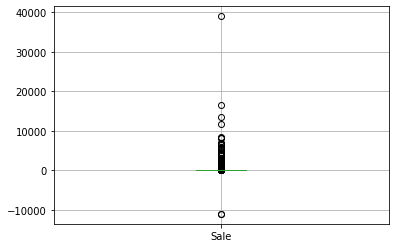

In [10]:
# Check value ranges of Sale's items
print("Sale's value ranges:")
print("TOT : ", len(df['Sale']))
print(" < 0: ", len(df[df['Sale'] < 0]))
print(" > 100: ", len(df[df['Sale'] > 100]))
print(" > 1000: ", len(df[df['Sale'] > 1000]))
df.boxplot(column=['Sale'])

There are some clear outliers, let's see if we can improve the situation by cleaning other attributes first...

### Analyzing _Qta_:
* Check rows with **negative** quantity:

In [11]:
# Check rows with negative quantity
bid_normal = 0  # counter of rows with normal BasketID (but negative Qta)
proddescr_null = 0  # counter of rows with a empty or null or '?' ProdDescr
cid_null = 0    # counter of rows with a null/nan/empty CustomerID

for index, row in df[df['Qta'] < 0].iterrows():
    bid_normal += 1 if (not 'C' in row['BasketID'] and not 'A' in row['BasketID']) else 0
    proddescr_null += 1 if row['ProdDescr'] in ('','?') else 0
    cid_null += 1 if pd.isna(row['CustomerID']) else 0

print("Number of rows with negative Qta: ", len(df[df['Qta'] < 0]))
print("Number of rows with negative Qta and a normal BaskedID: ", bid_normal)
print("Number of rows with negative Qta and an empty/null/'?' ProdDescr: ", proddescr_null)
print("Number of rows with negative Qta and a null/nan/empty CustomerID: ", cid_null)

Number of rows with negative Qta:  9719
Number of rows with negative Qta and a normal BaskedID:  668
Number of rows with negative Qta and an empty/null/'?' ProdDescr:  22
Number of rows with negative Qta and a null/nan/empty CustomerID:  847


### Analyzing _CustomerID_:
* Check for how many orders it's not possible to find a _CustomerID_
* Remove entries with no retrievable _CustomerID_
* Make _CustomerID_ of type **int**

In [12]:
"""
Check for which BaskedIDs it's not possible to find a CustomerID:
    - if a CustomerID is NaN, but there exist a row with the same BaskedID and CustomerID != Nan, then we have a customer for that order.

We produce a dictionary with BaskedIDs as keys and boolean values:
    - if there's a customer for that BaskedID, it's True, otherwise it's False
"""

print("Checking rows with no CustomerID...")
orders_have_customer = dict(zip(
    df['BasketID'].unique(),    # keys
    [False] * len(df['BasketID'].unique()))  # values (initially False for every key)
)

for index, row in df.iterrows():
    if not pd.isna(row['CustomerID']):
        orders_have_customer[row['BasketID']] = True

orders_wo_cust = [] # list of orders without CustomerID
for k, v in orders_have_customer.items():
    if not v:
        orders_wo_cust.append(k)

del orders_have_customer
print("Number of distinct orders: ", len(df['BasketID'].unique()))
print("Number of orders without CustomerID: ", len(orders_wo_cust))

Checking rows with no CustomerID...
Number of distinct orders:  24627
Number of orders without CustomerID:  2437


In [13]:
# Delete from dataframe records belonging to orders without customer
df = df[~df['BasketID'].isin(orders_wo_cust)]
del orders_wo_cust
print(f"The dataframe contains now {len(df)} rows")
print(f"Remaining entries with a NaN CustomerID: {len(df[pd.isna(df['CustomerID'])])}")

The dataframe contains now 401605 rows
Remaining entries with a NaN CustomerID: 0


In [14]:
# check if the decimal part is always 0
count_decpart_nonzero = 0
for elem in df['CustomerID']:
    if elem % 1.0 != 0.0 and not pd.isnull(elem):
        count_decpart_nonzero += 1
print('Number of CustomerIDs with decimal part != 0: ', count_decpart_nonzero)

Number of CustomerIDs with decimal part != 0:  0


In [15]:
# Make 'CustomerID' of type int
if count_decpart_nonzero == 0:
    df = df.astype({'CustomerID': int})

df.dtypes

BasketID            object
BasketDate          object
Sale               float64
CustomerID           int32
CustomerCountry     object
ProdID              object
ProdDescr           object
Qta                  int64
dtype: object

Let's perform again the analysis on Qta we did before analysing CustomerID:

In [16]:
# Check rows with negative quantity
bid_normal = 0  # counter of rows with normal BasketID (but negative Qta)
proddescr_null = 0  # counter of rows with a empty or null or '?' ProdDescr
cid_null = 0    # counter of rows with a null/nan/empty CustomerID

for index, row in df[df['Qta'] < 0].iterrows():
    bid_normal += 1 if (not 'C' in row['BasketID'] and not 'A' in row['BasketID']) else 0
    proddescr_null += 1 if row['ProdDescr'] in ('','?') else 0
    cid_null += 1 if pd.isna(row['CustomerID']) else 0

print("Number of rows with negative Qta: ", len(df[df['Qta'] < 0]))
print("Number of rows with negative Qta and a normal BaskedID: ", bid_normal)
print("Number of rows with negative Qta and an empty/null/'?' ProdDescr: ", proddescr_null)
print("Number of rows with negative Qta and a null/nan/empty CustomerID: ", cid_null)

Number of rows with negative Qta:  8872
Number of rows with negative Qta and a normal BaskedID:  0
Number of rows with negative Qta and an empty/null/'?' ProdDescr:  0
Number of rows with negative Qta and a null/nan/empty CustomerID:  0


This shows that every row of the orders with a NaN _CustomerID_ had also
anomalous values of _BasketID_ and _ProdDescr_

In [17]:
all_paired = True
count_pairs = count_legal_pairs = count_not_paired = 0
for index, row in df[df['Qta'] < 0].iterrows():
    found = False
    df_aux = df[df['CustomerID'] == row['CustomerID']]
    df_aux = df_aux[df_aux['ProdID'] == row['ProdID']]
    df_aux = df_aux[df_aux['Qta'] > 0]
    if len(df_aux) > 0:
        found = True
        count_pairs += 1
        for i, r in df_aux.iterrows():
            if r['Qta'] >= abs(row['Qta']):
                count_legal_pairs += 1
                break

    if not found:
        all_paired = False
        count_not_paired += 1

del df_aux

print("All negative entries have a corresponding positive one: ", all_paired)
print("The negative entries which are not matched are: ", count_not_paired)
print("The negative entries which are matched are: ", count_pairs)
assert(len(df[df['Qta'] < 0]) == count_not_paired + count_pairs)
print("The legal negative entries are: ", count_legal_pairs)

All negative entries have a corresponding positive one:  False
The negative entries which are not matched are:  947
The negative entries which are matched are:  7925
The legal negative entries are:  7831


**Save cleaned dataframe in a csv**

In [18]:
df.to_csv('cleaned_dataframe.csv', sep='\t')